In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('BHP.csv')

In [3]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


location,bath,size,society,balcony

In [5]:
df.loc[df['location'].isnull(),::]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [6]:
df.loc[df['society']=='Grare S']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [7]:
x=df.loc[df['location'].isnull(),::].index

df=df.drop(x)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13319 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13319 non-null  object 
 1   availability  13319 non-null  object 
 2   location      13319 non-null  object 
 3   size          13303 non-null  object 
 4   society       7817 non-null   object 
 5   total_sqft    13319 non-null  object 
 6   bath          13246 non-null  float64
 7   balcony       12710 non-null  float64
 8   price         13319 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.0+ MB


In [8]:
df=df.drop(columns=['society'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13319 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13319 non-null  object 
 1   availability  13319 non-null  object 
 2   location      13319 non-null  object 
 3   size          13303 non-null  object 
 4   total_sqft    13319 non-null  object 
 5   bath          13246 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         13319 non-null  float64
dtypes: float64(3), object(5)
memory usage: 936.5+ KB


In [9]:
x=df.loc[(df['size'].isnull()) | (df['bath'].isnull()) | (df['balcony'].isnull()),::].index
df=df.drop(x)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


In [10]:
df[df.duplicated()]

df=df.drop_duplicates()

In [11]:
df=df.reset_index(drop=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12146 entries, 0 to 12145
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12146 non-null  object 
 1   availability  12146 non-null  object 
 2   location      12146 non-null  object 
 3   size          12146 non-null  object 
 4   total_sqft    12146 non-null  object 
 5   bath          12146 non-null  float64
 6   balcony       12146 non-null  float64
 7   price         12146 non-null  float64
dtypes: float64(3), object(5)
memory usage: 759.3+ KB


In [13]:
df.head(3)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00


In [14]:
df['availability']=df['availability'].map({'Ready To Move':1}).fillna(0).astype(int)

In [15]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [16]:
df['size']=df['size'].str.split(' ',n=1,expand=True)[0]

df=df.rename(columns={'size':'BHK'})

df.head(3)

,area_type,availability,location,BHK,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3,1440,2.0,3.0,62.00


In [17]:
df=df.astype({'bath':int,'balcony':int})
        

In [18]:
df.loc[27,'total_sqft']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12146 entries, 0 to 12145
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12146 non-null  object 
 1   availability  12146 non-null  int64  
 2   location      12146 non-null  object 
 3   BHK           12146 non-null  object 
 4   total_sqft    12146 non-null  object 
 5   bath          12146 non-null  int64  
 6   balcony       12146 non-null  int64  
 7   price         12146 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 759.3+ KB


In [19]:
# for idx,value in enumerate(df['total_sqft']):
#     if '-' in value:
#         print(idx,'value = ',value)



to_sqrt = {
"Sq. Meter": 10.7639,
"Sq. Yards": 9 ,
"Acres": 43560 ,
"Cents": 435.6 ,
"Guntha": 1089 ,
"Grounds": 2400 
}

In [20]:

for idx,value in enumerate(df['total_sqft']):
    if '-' in value:
        x = value.split('-',maxsplit=1)
        df.loc[idx,'total_sqft']=(float(x[0])+float(x[1]))//2
    else:
        for i in to_sqrt:
            if i in value:
              df.loc[idx,'total_sqft'] = float(value.removesuffix(i))*  to_sqrt[i]
        



df['total_sqft']=df['total_sqft'].astype(float).astype(int)

In [21]:
df=df[df.columns[[2,0,4,3,5,6,7,1]]]

df.head()


,location,area_type,total_sqft,BHK,bath,balcony,price,availability
0,Electronic City Phase II,Super built-up Area,1056,2,2,1,39.07,0
1,Chikka Tirupathi,Plot Area,2600,4,5,3,120.00,1
2,Uttarahalli,Built-up Area,1440,3,2,3,62.00,1
3,Lingadheeranahalli,Super built-up Area,1521,3,3,1,95.00,1
4,Kothanur,Super built-up Area,1200,2,2,1,51.00,1


In [22]:
df = df.sort_values(by=['total_sqft','price'],ascending=True)
df = df.reset_index(drop=True)
df.head()

,location,area_type,total_sqft,BHK,bath,balcony,price,availability
0,Srirampuram,Built-up Area,5,7,7,3,115.0,1
1,Suragajakkanahalli,Plot Area,11,3,3,2,74.0,0
2,Weavers Colony,Carpet Area,15,1,1,0,30.0,1
3,Grihalakshmi Layout,Built-up Area,24,5,2,2,150.0,1
4,Mysore Road,Plot Area,45,1,1,0,23.0,1


# 1. Number of houses in the dataset

In [23]:
df.shape[0]

12146

# 2. Number of houses that are currently unavailable

In [24]:
df['availability'].value_counts()[1]

np.int64(9639)

# 3. Number of houses that are currently available

In [25]:
df.loc[df['availability']==1,'availability'].count()

np.int64(9639)

# 4. Number of houses located in Electronic City

In [26]:
df.loc[df['location']=='Electronic City','location'].count()

np.int64(284)

# 5. Number of 2BHK houses with at least 2 bathrooms and a balcony


In [27]:
df.loc[(df['BHK']==2) & (df['bath']>=2) & (df['balcony']>=2) , 'BHK' ].count()

np.int64(0)

# 6. Top five locations with the most houses for sale


In [28]:
df['location'].value_counts().head(5)

location
Whitefield         497
Sarjapur  Road     352
Electronic City    284
Kanakpura Road     231
Thanisandra        226
Name: count, dtype: int64

# 7. Top five locations with the most houses currently available

# 8. Unique values in the area type column

In [29]:
df['area_type'].unique()

array(['Built-up  Area', 'Plot  Area', 'Carpet  Area',
       'Super built-up  Area'], dtype=object)

# 9. Average price for each area type


In [30]:
gp = df.groupby(['area_type'])['price'].mean().sort_values()

gp

area_type
Carpet  Area             81.764695
Super built-up  Area     89.740675
Built-up  Area          100.172914
Plot  Area              198.558362
Name: price, dtype: float64

# 10. Average price for each location

In [31]:
# gp = df.groupby(['location'])['price'].mean()

round(df.groupby(['location'])['price'].mean(),2)

# gp

location
 Anekal                  16.00
 Banaswadi               35.00
 Basavangudi             50.00
 Bhoganhalli             22.89
 Devarabeesana Halli    124.83
                         ...  
singapura paradise      140.00
t.c palya               160.00
tc.palya                 60.75
vinayakanagar           200.00
whitefiled               32.73
Name: price, Length: 1265, dtype: float64

#  11. Highest price in each location

In [32]:
gp = df.groupby(['location'])['price'].max()



gp

location
 Anekal                  16.00
 Banaswadi               35.00
 Basavangudi             50.00
 Bhoganhalli             22.89
 Devarabeesana Halli    160.00
                         ...  
singapura paradise      140.00
t.c palya               160.00
tc.palya                 78.00
vinayakanagar           200.00
whitefiled               32.73
Name: price, Length: 1265, dtype: float64

# 12. Details of the top 2 houses with the highest price

In [33]:
cond = df['price'].sort_values(ascending=False).head(2)

# df.loc[cond,::]

cond

12100    2912.0
12098    2800.0
Name: price, dtype: float64

# 13. Highest sqft among all houses

In [34]:
df['total_sqft'].max()

np.int64(1306800)

# 14. Average sqft among all houses

In [35]:
df['total_sqft'].mean()

np.float64(1814.3443108842416)

# 15. Highest and average price in each location and area type

In [36]:
df.groupby(['location','area_type']).agg({'price':['max','mean']})

price        
                                              max    mean
location             area_type                           
 Anekal              Built-up  Area         16.00   16.00
 Banaswadi           Super built-up  Area   35.00   35.00
 Basavangudi         Super built-up  Area   50.00   50.00
 Bhoganhalli         Super built-up  Area   22.89   22.89
 Devarabeesana Halli Built-up  Area        149.00  149.00
...                                           ...     ...
singapura paradise   Plot  Area            140.00  140.00
t.c palya            Plot  Area            160.00  160.00
tc.palya             Plot  Area             78.00   60.75
vinayakanagar        Super built-up  Area  200.00  200.00
whitefiled           Super built-up  Area   32.73   32.73

[2238 rows x 2 columns]

# 16. Detect outliers in price and sqft


<Axes: ylabel='price'>

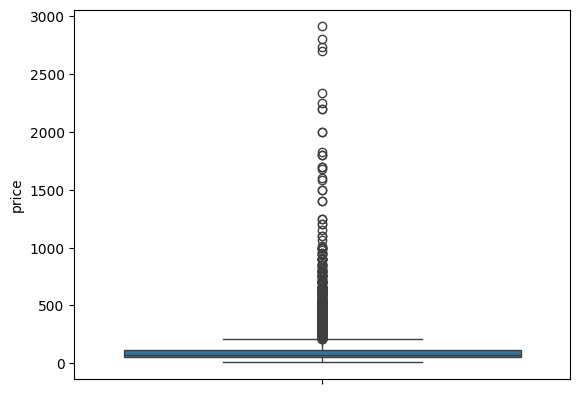

In [37]:
import seaborn as sns

sns.boxplot(df,y='price')

<Axes: ylabel='total_sqft'>

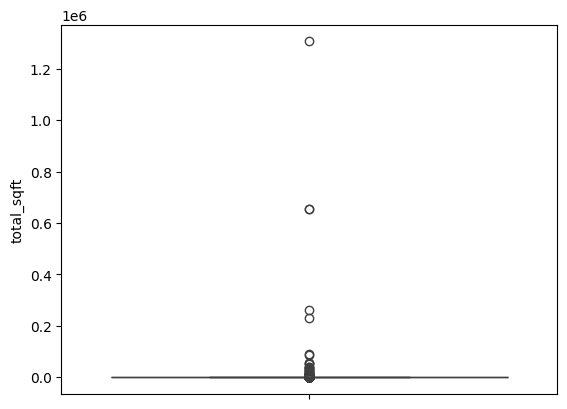

In [38]:
sns.boxplot(df,y='total_sqft')

#  17. Location with the most houses for sale

In [41]:
gp = df.groupby(['location'])['location'].count()
gp

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
singapura paradise      1
t.c palya               1
tc.palya                4
vinayakanagar           1
whitefiled              1
Name: location, Length: 1265, dtype: int64

#  18. Location with the most houses currently available for sale

#  19. Average price in each location (visualized using a bar plot)

In [39]:
gp = df.groupby(['location'])

sns.barplot(data=df,x='gp',y=['price'].mean())


AttributeError: 'list' object has no attribute 'mean'